In [311]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [312]:
data=pd.read_csv("https://git.io/vpaM1",parse_dates=["date"])

In [313]:
data.head(10)

date    demand  temp
0 2015-01-01  1.736065   1.7
1 2015-01-02  1.831672   2.2
2 2015-01-03  1.714934  14.4
3 2015-01-04  1.628577  15.6
4 2015-01-05  2.045394   0.0
5 2015-01-06  2.122799  -6.7
6 2015-01-07  2.243265  -9.4
7 2015-01-08  2.240975  -8.9
8 2015-01-09  2.128072  -6.1
9 2015-01-10  1.979734  -8.9

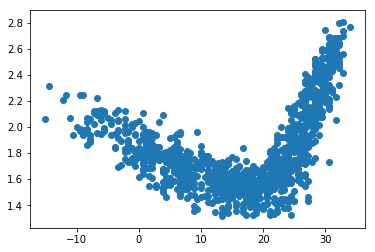

In [314]:
plt.scatter(data.temp, data.demand)

Text(0, 0.5, 'Peak demand(GW)')

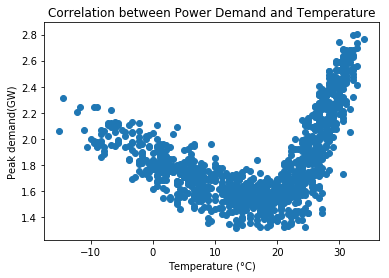

In [315]:
plt.scatter(data.temp, data.demand)
plt.title("Correlation between Power Demand and Temperature")
plt.xlabel("Temperature (°C)")
plt.ylabel("Peak demand(GW)")

In [316]:
data.date.dt.month.head()

0    1
1    1
2    1
3    1
4    1
Name: date, dtype: int64

In [317]:
data_summer=data.loc[data.date.dt.month.between(6,8)]

In [318]:
data_summer.head(10)

date    demand  temp
151 2015-06-01  1.640036  15.6
152 2015-06-02  1.663211  17.2
153 2015-06-03  1.728381  21.7
154 2015-06-04  1.921615  25.0
155 2015-06-05  2.153111  27.8
156 2015-06-06  1.717011  23.9
157 2015-06-07  1.936838  28.9
158 2015-06-08  2.202273  26.1
159 2015-06-09  1.967314  23.9
160 2015-06-10  2.381218  30.0

In [319]:
def uni_lin_reg_gd(x,y,N=50, step_size=0.001):
    alpha,beta = 0,0
    for it in range(N):
        error = alpha * x + beta - y
        d_alpha = 2 * (error * x).mean()
        d_beta = 2 * error.mean()
        alpha -= step_size * d_alpha
        beta -= step_size * d_beta
        return alpha, beta

In [320]:
def plot_reg_line(x,y,alpha,beta):
    #disegno il grafico a dispersione
    plt.scatter(x,y)
    #matplotlib ha impostato automaticamente gli intervalli X e Y del grafico
    #ma li estraggo in forma di due tuple (Xmin,Xmax) e (Ymin,Ymax)
    xlim = plt.gca().get_xlim()
    ylim = plt.gca().get_ylim()
    #definisco le coordinate dei due punti estremi della linea da tracciare
    #le coordinate X sono i limiti dell'asse X del grafico
    line_x = np.array(xlim)
    #con il modello di regressione calcolo le corrispondenti coordinate Y
    line_y = alpha * line_x + beta
    #traccio la linea sovrapposta al grafico a dispersione già tracciato 
    plt.plot(line_x,line_y, c="red",lw=3) # colore e spessore
    # i limiti del grafico sono ricalcolati sulla linea: si devono reimpostare
    plt.xlim(xlim)
    plt.ylim(ylim)

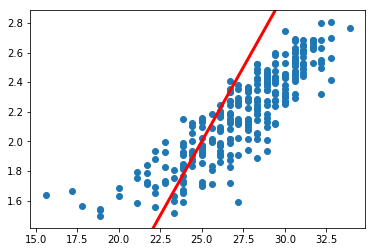

In [321]:
plot_reg_line(data_summer.temp,data_summer.demand, 0.2,-3)

In [322]:
def plot_uni_lin_reg_gd(X,Y,N):
    alpha,beta = uni_lin_reg_gd(X,Y,N)
    plot_reg_line(X,Y,alpha,beta)
    return alpha,beta

(0.12111570253623187, 0.0043684136956521746)

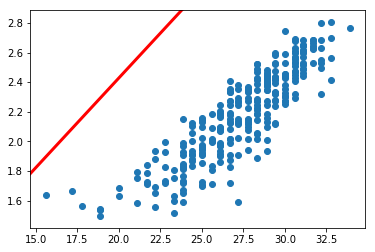

In [323]:
plot_uni_lin_reg_gd(data_summer.temp,data_summer.demand,1) 

(0.12111570253623187, 0.0043684136956521746)

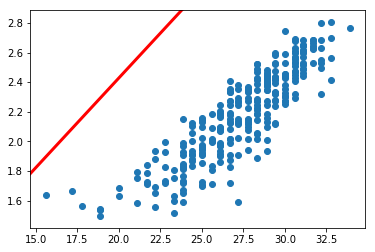

In [324]:
plot_uni_lin_reg_gd(data_summer.temp,data_summer.demand,2) 

(0.12111570253623187, 0.0043684136956521746)

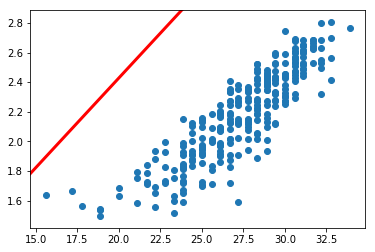

In [325]:
plot_uni_lin_reg_gd(data_summer.temp,data_summer.demand,3) 

(0.12111570253623187, 0.0043684136956521746)

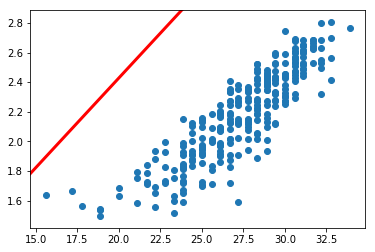

In [326]:
plot_uni_lin_reg_gd(data_summer.temp,data_summer.demand,4) 

(0.12111570253623187, 0.0043684136956521746)

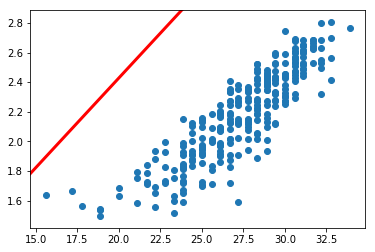

In [327]:
plot_uni_lin_reg_gd(data_summer.temp,data_summer.demand,100) 